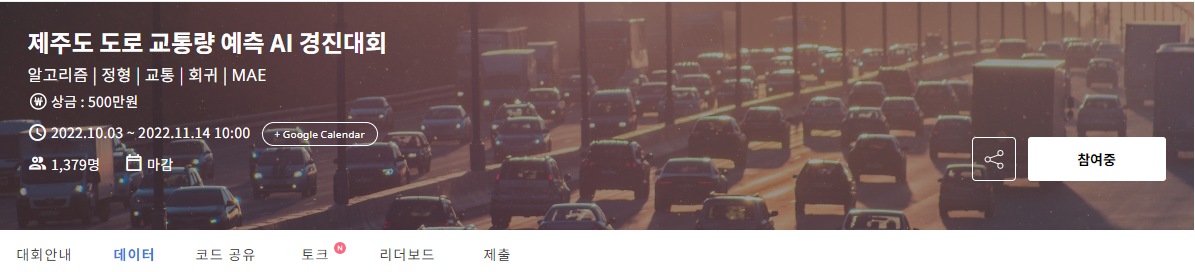

# <제주도 도로 교통량 예측 AI 프로젝트 개시>

## [배경] 
제주도내 주민등록인구는 2022년 기준 약 68만명으로, 연평균 1.3%정도 매년 증가하고 있습니다.

또한 외국인과 관광객까지 고려하면 전체 상주인구는 90만명을 넘을 것으로 추정되며, 

제주도민 증가와 외국인의 증가로 현재 제주도의 교통체증이 심각한 문제로 떠오르고 있습니다.

## [주제]
제주도 도로 교통량 예측 AI 알고리즘 개발

## [설명]
`제주도의 교통 정보로부터 도로 교통량 회귀 예측`



# [Dataset Info.]

### 1. train.csv [파일] 
- 2022년 8월 이전 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)
- 4,701,217개의 데이터
- id : 샘플 별 고유 id
- 날짜, 시간, 교통 및 도로구간 등 정보
- target : 도로의 차량 평균 속도(km)


### 2. test.csv [파일]
- 2022년 8월 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)
- 291,241개의 데이터
- id : 샘플 별 고유 id
- 날짜, 시간, 교통 및 도로구간 등 정보


### 3. data_info.csv [파일]
- 데이터의 각 Column별 추가 설명
- 가급적 pandas 패키지를 이용하여 오픈하는 것을 권장합니다. (엑셀에서 load시 - 한글이 깨져 보일 수 있음)


### 4. sample_submission.csv [제출양식]
- id : 샘플 별 고유 id
- target : 도로의 차량 평균 속도(km)

### 결론

평균속도로 교통량 측정하기.

데이터를 확인한 결과는 다음과 같습니다.

-base_date(날짜) : 2021.09.01 - 2022.07.31

-day_of_week(요일) : 월,화,수,목,금,토,일


-base_hour(시간대) : 0 - 23


-lane_count(차로수) : 1, 2, 3


-road_rating(도로등급) : 103, 106, 107

-road_name(도로이름) : 61 가지의 도로명(일반국도12호선, -(결측치) 등....)


-multi_linked(중용구간 여부) : 0, 1

-connect_code(연결로 코드) : 0, 103

-maximum_speed_limit(최고속도제한) : 30, 50, 60, 70, 80


-vehicle_restricted(통과제한차량) : 0

-weight_restricted(통과제한하중) :0/ 43200/ 32400/ 50000


-height_restricted(통과제한높이) : 0

-road_type(도로유형) : 0, 3


-start_node_name, end_node_name : 487 도로, 장소명

-start_latitude, start_longitude : 586 가지 출발점 위,경도

-end_latitude, end_longitude : : 586 가지 도착점 위,경도


-start_turn_restricted : 있음, 없음


-end_turn_restricted : 있음, 없음


-target : 평균속도(예측해야할 값)

# 1. Data Load & Data library Load

data_info에서 떠오르는 생각 & 도메인
1. 위도 경도는 지도 관련 데이터를 넣어야 할듯 싶다.
2. 중용구간의 의미는?
- 도로 노선이 변경되었을 경우, 노선의 변화를시간적으로
관리할 수 있는 이력관리체계가 정립되어 있지 않아 노선변경 전의 위치와 노선변경 후의 위치를 바탕으로 한 해당년도별 도로 관련 정보의 조회 등 도로관리 정보화 사업수행에 어려운 점이 있다. 특히 일반국도는 고속국도에 비해 시가지 우회 도로 개설, 도로의선형 개선 사업 등의 도로의 노선 변화 및 연장 변화가 심하여 합리적인 이력관리체계가 더욱 필요하다. 일반국도의 도로 구간은 전용구간과 중용구간으로 나눌 수 있다. 전용구간이란하나의 노선이 도로를 전적으로 사용하는 구간을 말하며 2개 이상의 노선이 도로의 일정 구간을 공동으로 사용하는 구간을 중용구간이라한다. 2002년 현재 우리나라 전체 일반국도의총 연장은 약 12,420km 정도이며, 이중 약1200km 정도가 2개 이상의 노선이 공동으로 사용하는 중용구간이다.

3. 통과제한하중: 과적으로인한 도로 파괴과적...
4. 통과제한차량: 무게가 우선 부피도 제재도 한다.
5. 도로등급: 도로상태를 보고 정함.
6. 승용차: 1차선~3차선
7. 화물차는 3차선
8. 일반도로/고속도로/추월선(고속도로에서 1차선에서만 가능)
9. 노선: 교통 기관이 통과하는 출발 지점과 목적 지점을 잇는 선이다. 철도 노선, 버스 노선, 항공 노선, 항로 등이 있다.
10. 데이터 조사기간: 2021.09.31 ~ 2022.07.31 거의 1년치인데 관광객을 목표로해서 저 날까기간을 둔가 아닐까? 싶다.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib as mpl
import os
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import StratifiedKFold as kfold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold as kfold
# from sklearn.ensemble import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures



# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 제주도 대회 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/머신러닝 프로젝트 with 패스트캠퍼스, 김재승/제주도 도로 교통량 예측 AI 경진대회/"

train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")
submission = pd.read_csv(base_path + "sample_submission.csv")
data_info = pd.read_csv(base_path + "data_info.csv")

In [5]:
# 분석에서 제외

train_desc = train.describe().transpose()
train_desc[train_desc['std']==0].index

Index(['vehicle_restricted', 'height_restricted'], dtype='object')

In [6]:
# 결측치 확인
train = train.drop(columns=['vehicle_restricted', 'height_restricted'])
test = test.drop(columns=['vehicle_restricted', 'height_restricted'])
train.shape, test.shape

((4701217, 21), (291241, 20))

In [7]:
# 공휴일


In [8]:
# 위도, 경도 차이
train['lat_change'] = train['start_latitude'] - train['end_latitude']
train['lon_change'] = train['start_longitude'] - train['end_longitude']

test['lat_change'] = test['start_latitude'] - test['end_latitude']
test['lon_change'] = test['start_longitude'] - test['end_longitude']

In [9]:
# 두지점 사이의 거리
from math import radians, cos, sin, asin, sqrt

def haversine(row):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1 = row['start_longitude']
    lat1 = row['start_latitude']
    lon2 = row['end_longitude']
    lat2 = row['end_latitude']

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

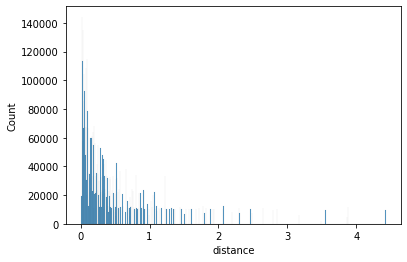

In [10]:
train['distance'] = train.apply(haversine, axis=1)
sns.histplot(data=train, x='distance')

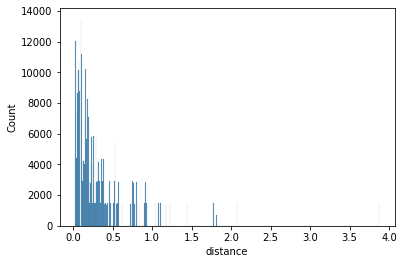

In [11]:
test['distance'] = test.apply(haversine, axis=1)
sns.histplot(data=test, x='distance')

In [12]:
# 제주공항까지 거리
def haversine_airport(row):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1 = 126.4913534
    lat1 = 33.5104135
    lon2 = (row['start_longitude'] + row['end_longitude']) / 2
    lat2 = (row['start_latitude'] + row['end_latitude']) / 2

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

train['airport_distance'] = train.apply(haversine_airport, axis=1)
test['airport_distance'] = test.apply(haversine_airport, axis=1)

## 제주도 권역별 구분하여 변수 추가
* 제주시 도심 : 126.4531517 ~ 126.5900257 , 33.4670429 ~ 
* 서귀포 도심 : 126.3972753 ~ 126.6076604 , ~ 33.2686052

In [13]:
# 출발지점 권역
mask_jj_start = (train['start_longitude'] > 126.4531517) & (train['start_longitude']< 126.5900257) & (train['start_latitude'] > 33.4670429)
mask_jj_end = (train['end_longitude'] > 126.4531517) & (train['end_longitude']< 126.5900257) & (train['end_latitude'] > 33.4670429)

mask_sgp_start = (train['start_longitude'] > 126.3972753) & (train['start_longitude']< 126.6076604) & (train['start_latitude'] < 33.2686052)
mask_sgp_end = (train['end_longitude'] > 126.3972753) & (train['end_longitude']< 126.6076604) & (train['end_latitude'] < 33.2686052)

In [14]:
train['center_start'] = 0
test['center_start'] = 0

train.loc[mask_jj_start, 'center_start'] = 1
train.loc[mask_sgp_start, 'center_start'] = 2

test.loc[mask_jj_start, 'center_start'] = 1
test.loc[mask_sgp_start, 'center_start'] = 2

train['center_end'] = 0
test['center_end'] = 0

train.loc[mask_jj_end, 'center_end'] = 1
train.loc[mask_sgp_end, 'center_end'] = 2

test.loc[mask_jj_end, 'center_end'] = 1
test.loc[mask_sgp_end, 'center_end'] = 2

In [15]:
# GPS 정보를 사용해서 road 구분
train['road_code'] = train['start_latitude'].astype(str)+'_'+train['start_longitude'].astype(str)+'_'+train['end_latitude'].astype(str)+'_'+train['end_longitude'].astype(str)
train['road_code'].value_counts()

33.3058672207151_126.599081327413_33.3082357708673_126.598689775097    6477
33.3082357708673_126.598689775097_33.3058672207151_126.599081327413    6397
33.5014774884938_126.569223187609_33.4968633703578_126.58123009621     6077
33.5016270326083_126.568923085567_33.5014774884938_126.569223187609    6077
33.496710616894_126.581529061335_33.4918481088766_126.591872255149     6075
                                                                       ... 
33.2566709359707_126.52441046863_33.2541529264473_126.524330998601      744
33.26127013848_126.524428741607_33.2574097173209_126.524412034435       744
33.2574097173209_126.524412034435_33.2566709359707_126.52441046863      744
33.2574097173209_126.524412034435_33.26127013848_126.524428741607       587
33.2574006381515_126.52574476307_33.2574097173209_126.524412034435      587
Name: road_code, Length: 904, dtype: int64

In [16]:
test['road_code'] = test['start_latitude'].astype(str)+'_'+test['start_longitude'].astype(str)+'_'+test['end_latitude'].astype(str)+'_'+test['end_longitude'].astype(str)
test['road_code'].value_counts()

33.508463678702_126.558231105407_33.5087115227295_126.558702856002     740
33.4937925855376_126.492189386746_33.4923347723675_126.490247073997    740
33.4666066165642_126.454021511351_33.4664333666973_126.454583167413    740
33.4923347723675_126.490247073997_33.4937925855376_126.492189386746    740
33.4658632729266_126.456384480352_33.4664333666973_126.454583167413    740
                                                                      ... 
33.3452396554215_126.850113181832_33.3446283972409_126.849278713014      7
33.4857069297096_126.604162168012_33.4886994919865_126.597620980703      7
33.4379464931581_126.73250865826_33.4383285187565_126.732031757687       7
33.4359411786532_126.736248543312_33.4379464931581_126.73250865826       7
33.4288406442461_126.750881044473_33.4359411786532_126.736248543312      7
Name: road_code, Length: 441, dtype: int64

In [17]:
# target encoding
road_stats = train.groupby(['road_code'])[['target']].agg(['min', 'mean', 'max', 'std']).reset_index()
road_stats.columns = ['road_code', 'road_min', 'road_mean', 'road_max', 'road_std']
train = train.merge(road_stats, how='left', on='road_code')
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,lon_change,distance,airport_distance,center_start,center_end,road_code,road_min,road_mean,road_max,road_std
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,0.000277,0.025694,18.330548,0,0,33.427747274683_126.662612038652_33.4277487730...,16.0,51.756910,72.0,4.587047
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0.002867,0.525560,3.470872,1,1,33.5007304293026_126.529106761554_33.504811303...,5.0,26.400712,59.0,7.102290
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0.006450,0.608016,28.185912,0,0,33.2791450972975_126.368597660936_33.280072104...,32.0,59.101720,88.0,12.091252
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0.000976,0.107285,30.222870,2,2,33.2460808686345_126.56720431031_33.2455654004...,2.0,25.024923,51.0,7.667545
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,-0.003601,0.337736,16.019878,0,0,33.4622143482158_126.326551111199_33.462676772...,25.0,39.873670,72.0,6.946840


In [18]:
test = test.merge(road_stats, how='left', on='road_code')
print(test['road_code'].isnull().sum())
test.head()

0


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,lon_change,distance,airport_distance,center_start,center_end,road_code,road_min,road_mean,road_max,road_std
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,-0.002538,0.278752,4.881938,0,0,33.4994265233055_126.541298167922_33.500772491...,9.0,33.623164,60.0,9.997806
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.011164,1.038287,28.756351,1,1,33.2585071159642_126.427003448638_33.258119397...,21.0,48.359276,69.0,5.381406
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.001820,0.171335,27.967410,0,0,33.2589595714352_126.476507600171_33.259205665...,35.0,59.993453,86.0,5.444524
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.000180,0.270917,6.572143,2,2,33.4734941166381_126.54564685499_33.4710608036...,6.0,33.185444,55.0,6.060564
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,-0.012007,1.225101,7.871524,0,0,33.5014774884938_126.569223187609_33.496863370...,10.0,46.299654,83.0,6.779434


In [19]:
# 범주형 변수 인코딩
# label encoding
str_col = ['day_of_week', 'road_rating', 'road_type', ]
for i in str_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    train[i]=le.transform(train[i])
    
    for label in np.unique(test[i]):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test[i]=le.transform(test[i])

In [20]:
# onehot_encoding
train = pd.get_dummies(train, columns = str_col[1:], drop_first=False)
test = pd.get_dummies(test, columns = str_col[1:], drop_first=False)


In [21]:
# 변수 선택
y_train = train['target'] 

X_train = train.drop(['id','base_date', 'target', 'start_node_name', 'end_node_name', 'multi_linked', 'connect_code', 
                      'start_latitude', 'start_longitude', 
                       'center_start', 'center_end', 
                      'weight_restricted', 'road_rating_0',
                      'road_rating_1', 'road_rating_2', 'road_type_0', 'road_type_1',
                      'start_turn_restricted','end_turn_restricted',
                      'road_min', 'road_max', 'road_std',
                      'road_name', 'road_code'], axis=1)

X_test = test.drop(['id','base_date', 'start_node_name', 'end_node_name', 'multi_linked', 'connect_code', 
                    'start_latitude', 'start_longitude', 
                     'center_start', 'center_end', 
                    'weight_restricted', 'road_rating_0',
                    'road_rating_1', 'road_rating_2', 'road_type_0', 'road_type_1',
                    'start_turn_restricted','end_turn_restricted',
                    'road_min', 'road_max', 'road_std',
                    'road_name', 'road_code'], axis=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(4701217, 11)
(4701217,)
(291241, 11)


In [22]:
X_train.head()

,day_of_week,base_hour,lane_count,maximum_speed_limit,end_latitude,end_longitude,lat_change,lon_change,distance,airport_distance,road_mean
0,1,17,1,60.0,33.427749,126.662335,-0.000001,0.000277,0.025694,18.330548,51.756910
1,1,21,2,60.0,33.504811,126.526240,-0.004081,0.002867,0.525560,3.470872,26.400712
2,4,7,2,80.0,33.280072,126.362147,-0.000927,0.006450,0.608016,28.185912,59.101720
3,0,13,2,50.0,33.245565,126.566228,0.000515,0.000976,0.107285,30.222870,25.024923
4,6,8,2,80.0,33.462677,126.330152,-0.000462,-0.003601,0.337736,16.019878,39.873670


In [23]:
X_test.head()

,day_of_week,base_hour,lane_count,maximum_speed_limit,end_latitude,end_longitude,lat_change,lon_change,distance,airport_distance,road_mean
0,1,17,3,70.0,33.500772,126.543837,-0.001346,-0.002538,0.278752,4.881938,33.623164
1,6,12,2,70.0,33.258119,126.415840,0.000388,0.011164,1.038287,28.756351,48.359276
2,0,2,1,60.0,33.259206,126.474687,-0.000246,0.001820,0.171335,27.967410,59.993453
3,1,23,3,70.0,33.471061,126.545467,0.002433,0.000180,0.270917,6.572143,33.185444
4,2,17,3,70.0,33.496863,126.581230,0.004614,-0.012007,1.225101,7.871524,46.299654


In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train.loc[:, :] = scaler.transform(X_train)
X_test.loc[:, :] = scaler.transform(X_test)

X_test.head(2)

,day_of_week,base_hour,lane_count,maximum_speed_limit,end_latitude,end_longitude,lat_change,lon_change,distance,airport_distance,road_mean
0,-0.991029,0.754498,1.691525,0.72087,1.150794,0.141615,-0.314152,-0.409113,-0.291169,-1.433274,-0.637912
1,1.506502,0.010682,0.237511,0.72087,-1.247087,-0.677032,0.091003,1.808738,0.990841,0.753408,0.387736


In [1]:
train.drop["id"]

sns.heatmap(data=train)
plt.show()

NameError: ignored

In [25]:
# Train-Test Split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                            stratify=train['base_hour'], random_state=2021)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(3760973, 11) (3760973,)
(940244, 11) (940244,)


In [ ]:
# xgboost 모델2
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=10000, 
                              max_depth=5, 
                              subsample=0.3,
                              colsample_bytree=0.5,
                              reg_lambda=15,
                              random_state=20)


xgb_model.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='mae',
                verbose=100,
                early_stopping_rounds=200)    


from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_train, xgb_model.predict(X_train))}")
print(f"검증 셋: {mean_absolute_error(y_val, xgb_model.predict(X_val))}")

In [ ]:
# Xgboost 의 피처 중요도
feature_names = X_train.columns
importances = xgb_model.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
# xgb 추론
pred1 = xgb_model.predict(X_test)
len(pred1)

In [ ]:
#xgb submission 예비형식
sub1 = submission.copy()
sub1['target'] = pred  

In [ ]:
# LightGBM
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=100, 
                              num_leaves = 128, 
                              subsample=0.6,
                              colsample_bytree=0.7,
                              reg_lambda=15,
                              random_state=20)


lgb_model.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='l1',
                verbose=500,
                early_stopping_rounds=100)    


from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_train, lgb_model.predict(X_train))}")
print(f"검증 셋: {mean_absolute_error(y_val, lgb_model.predict(X_val))}")

In [ ]:
#lgb_feature importance
feature_names = X_train.columns
importances = lgb_model.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
#lgb_submission 예비형식
pred2 = lgb_model.predict(X_test)
len(pred2)

In [ ]:
#lgb submission 예비형식
sub2 = submission.copy()
sub2['target'] = pred2  

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
import catboost as cb

In [ ]:
# catboost 모델

# from sklearn.model_selection import train_test_split
# X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

from catboost import CatBoostRegressor
import catboost as cb

cb_model = CatBoostRegressor(iterations=4000,
                                 learning_rate=0.1,
                                 depth=4,
                                 l2_leaf_reg=20,
                                 bootstrap_type='Bernoulli',
                                 subsample=0.6,
                                 eval_metric='MAE',
                                 metric_period=50,
                                 od_type='Iter',
                                 od_wait=45,
                                 random_seed=17,
                                 allow_writing_files=False)



cb_model.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                verbose=500) 


# early_stopping_rounds=500
from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_train, cb_model.predict(X_train))}")
print(f"검증 셋: {mean_absolute_error(y_val, cb_model.predict(X_val))}")

In [ ]:
# catboost 피처중요도
feature_names = X_train.columns
importances = cb_model.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
#cat 추론
pred3 = cb_model.predict(X_test)
len(pred3)


In [ ]:
#catboost submission 예비형식
sub3 = submission.copy()
sub3['target'] = pred3  

In [ ]:
# #Ensemble
# submission['target'] = np.round((sub1['target'] + sub2['target'] + sub3['target']) / 3)
# submission.to_csv("./final_submission2.csv", index = False)  

In [ ]:
submission['target'] = sub3['target']
submission.to_csv("./final_submission4.csv", index = False)  

In [ ]:
!pip install optuna

In [ ]:
# print("Prediction")
# pred_train = model.predict(X_train)
# pred_test = model.predict(X_val)

# train_score = evaluation_metric(y_train, pred_train)
# test_score = evaluation_metric(y_val, pred_test)

# print("Train Score : %.4f" % train_score)
# print("Test Score : %.4f" % test_score)

In [ ]:
# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna


def optimizer(trial, X, y, K):
    # 조절할 hyper-parameter 조합을 적어줍니다.
    iterations = trial.suggest_int('iterations', 1000, 5000)
    depth = trial.suggest_int('depth', 3, 5)  # 범위
    # max_features = trial.suggest_float('max_features', 0.7, 0.9)

    
    
    # 원하는 모델을 지정합니다, optuna는 시간이 오래걸리기 때문에 저는 보통 RF로 일단 테스트를 해본 뒤에 LGBM을 사용합니다.
    model = cb.CatBoostRegressor(iterations=iterations,
                                 depth=depth)
    
    
    # K-Fold Cross validation을 구현합니다.
    from sklearn.model_selection import StratifiedKFold
    folds = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in folds.split(X_train, y_train):
        X_train2 = X_train.iloc[train_idx, :]
        y_train2 = y_train.iloc[train_idx]
        
        X_val2 = X_train.iloc[val_idx, :]
        y_val2 = y_train.iloc[val_idx]
        
        model.fit(X_train2, y_train2)
        preds = model.predict(X_val2)
        score = evaluation_metric(y_val2, preds)
        scores.append(score)
    
    del model
    gc.collect()
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(scores)

In [ ]:
# metric은 그때마다 맞게 바꿔줘야 합니다.
from sklearn.metrics import matthews_corrcoef # MCC
evaluation_metric = matthews_corrcoef

In [ ]:
# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna

# Kfold 수
K = 3 
func = partial(optimizer, X=X_train, y=y_train, K=K)

study = optuna.create_study(direction="maximize") # 최소/최대 어느 방향의 최적값을 구할 건지.
study.optimize(func, n_trials=10)

In [ ]:
# optuna
import numpy as np
import pandas as pd
import optuna
from lightgbm import LGBMClassifier
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
# metric은 그때마다 맞게 바꿔줘야 합니다.
from sklearn.metrics import matthews_corrcoef # MCC
evaluation_metric = matthews_corrcoef




# 하이퍼파라미터 튜닝에 쓰고 있는 최신 Automl 기법입니다.
# 빠르게 튜닝이 가능하다는 장점이 있습니다.
# 하이퍼파라미터 튜닝 방식을 지정할수 있다. -> 직관적인 api인 튜닝된 lightgbm도 제공해줍니다.
# 다른 라이브러리들에 비해 직관적인 장점이 있어 코딩하기 용이합니다.

In [ ]:
def objective(trial: Trial) -> float:
    params_cb = {
        "random_seed": 17,
        "learning_rate": 0.1,
        "n_estimators": 5000,
        "reg_lambda": trial.suggest_float("reg_lambda", 20, 40),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
    }
    
    X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.2)

    model = CatBoostRegressor(**params_cb)
    model.fit(
        X_train2,
        y_train2,
        verbose=False,
    )

    cb_pred = model.predict_proba(X_val)
    log_score = log_loss(y_val, cb_pred)
    
    return log_score

In [ ]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="cb_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)